In [2]:
# importing the need libraries
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
import warnings
warnings.filterwarnings("ignore")
import math

## SEIR model with Estimated Parameters and no Mitigation Imposed

In [1]:
#SEIR function

def Basic_SEIR(y,t,N,beta,gamma,delta,alpha):
    S,E,I,R = y
    dsdt = -beta * I * S / N * (1 - alpha)
    dedt = beta * I * S / N * (1 - alpha)- delta * E
    didt = delta * E - gamma * I
    drdt = gamma * I
    return dsdt, dedt, didt, drdt

In [3]:
N = 1000 # Population
beta = 1.0
D = 4.0 # number of infections in the lasts four days
gamma = 1.0 / D # rate of recovery
delta = 1.0 / 3.0  # incubation period of three days
alpha = 0.001 # mitigation Effective number
hospital_capacity =100
S0 = 999
E0 = 0
I0, R0 = N - S0, 0  # at a start only one is infected while other population remains susceptible
y0= S0, E0, I0, R0

In [5]:
# time vector
import scipy.integrate
t = np.linspace(0,200,200)
ret = odeint(Basic_SEIR, y0, t, args = (N, beta, gamma, delta,alpha))
S, E, I, R = ret.T
I_no = I
R_t = beta * S / (S + I + E + R)

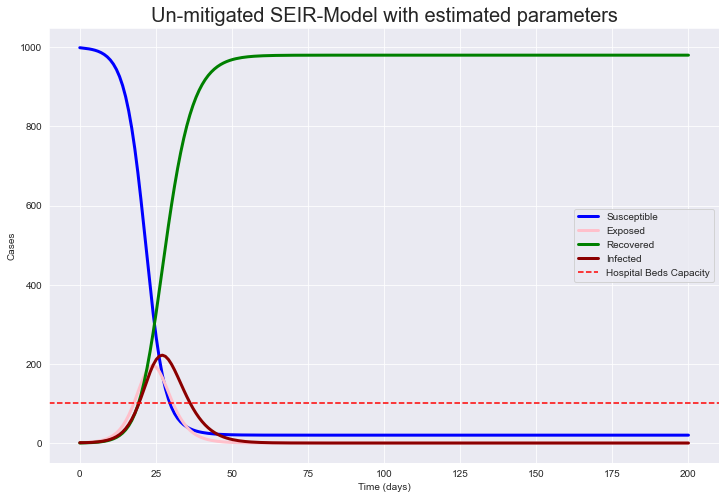

In [6]:
# Set seaborn style and plotting the model
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
plt.plot(t, S, color='blue', lw=3,label='Susceptible')
plt.plot(t, E, color='pink', lw=3, label='Exposed')
plt.plot(t, R, color='green', lw=3,label='Recovered')
plt.plot(t, I, color='darkred',lw=3, label='Infected')
plt.axhline(hospital_capacity, color='red', linestyle='--', label='Hospital Beds Capacity')
plt.title('Un-mitigated SEIR-Model with estimated parameters',fontsize = 20)
plt.xlabel('Time (days)')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()


## Scenario 1
### Mitigated SEIR model with 30% effectiveness of Intervention to denote social distancing Rule

In [7]:
def adjusted_model(y,t,N,beta,gamma,delta,alpha,hospital_capacity):
    S,E,I,R = y
    dsdt = -beta * I * S / N * (1 - alpha)
    dedt = beta * I * S / N * (1 - alpha) - delta * E
    didt = delta * E - gamma * I
    drdt = gamma * I
    return dsdt, dedt, didt, drdt

In [8]:
N = 1000 # Population
beta = 1.0
D = 4.0 # number of infections in the lasts four days
gamma = 1.0 / D # rate of recovery
delta = 1.0 / 3.0  # incubation period of three days
alpha = 0.3
hospital_capacity =100
S0 = 999
E0 = 0
I0, R0 = N - S0, 0  # at a start only one is infected while other population remains susceptible
y0= S0, E0, I0, R0

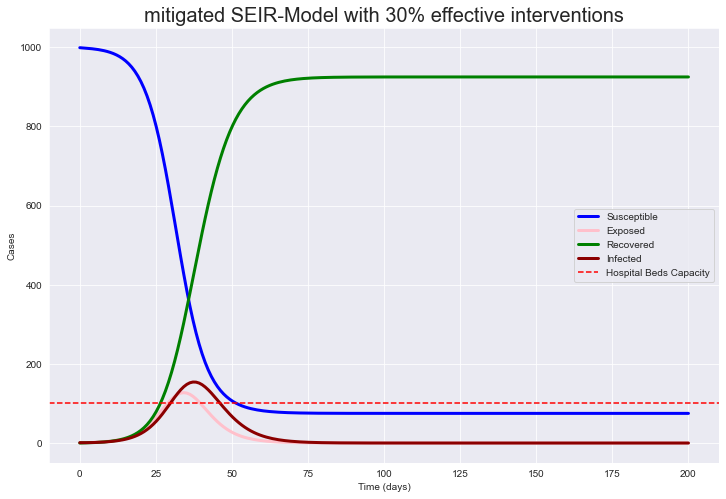

In [9]:
# Plotting the basic SEIR model results
t = np.linspace(0, 200, 200)
ret = odeint(adjusted_model, y0, t, args=(N, beta, gamma, delta,alpha,hospital_capacity))
S, E, I, R = ret.T
I30 = I
R_t = beta * S / (S + I + E + R)
# Set seaborn style and plotting the model
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
plt.plot(t, S, color='blue', lw=3,label='Susceptible')
plt.plot(t, E, color='pink', lw=3, label='Exposed')
plt.plot(t, R, color='green', lw=3,label='Recovered')
plt.plot(t, I, color='darkred',lw=3, label='Infected')
plt.axhline(hospital_capacity, color='red', linestyle='--', label='Hospital Beds Capacity')
plt.title('mitigated SEIR-Model with 30% effective interventions', fontsize = 20)
plt.xlabel('Time (days)')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()


## Sceniaro 2

### SEIR model with 50% effective of Intervention to denote total Lockdown with relaxed burden on Hospital capacity

In [10]:
N = 1000 # Population
beta = 1.0
D = 4.0 # number of infections in the lasts four days
gamma = 1.0 / D # rate of recovery
delta = 1.0 / 3.0  # incubation period of three days
alpha = 0.6 
hospital_capacity =100
S0 = 999
E0 = 0
I0, R0 = N - S0, 0  # at a start only one is infected while other population remains susceptible
y0= S0, E0, I0, R0

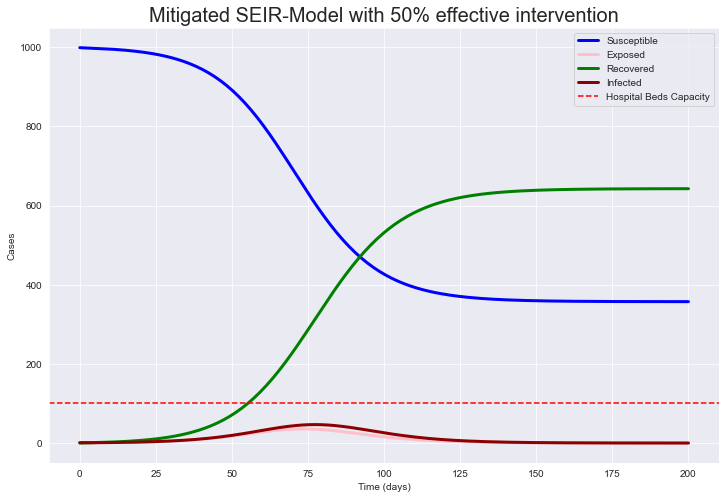

In [11]:
# Plotting the basic SEIR model results
t = np.linspace(0, 200, 200)
ret = odeint(adjusted_model, y0, t, args=(N, beta, gamma, delta,alpha,hospital_capacity))
S, E, I, R = ret.T
I50 = I
R_t = beta * S / (S + I + E + R)
# Set seaborn style and plotting the model
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
plt.plot(t, S, color='blue', lw=3,label='Susceptible')
plt.plot(t, E, color='pink', lw=3, label='Exposed')
plt.plot(t, R, color='green', lw=3,label='Recovered')
plt.plot(t, I, color='darkred',lw=3, label='Infected')
plt.axhline(hospital_capacity, color='red', linestyle='--', label='Hospital Beds Capacity')
plt.title('Mitigated SEIR-Model with 50% effective intervention', fontsize = 20)
plt.xlabel('Time (days)')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()


## Scenario 3

### SEIR model with 80% of intervention Effectiveness to denote  Testing and Isolation

In [12]:
N = 1000 # Population
beta = 1.4
D = 4.0 # number of infections in the lasts four days
gamma = 1.0 / D # rate of recovery
delta = 1.0 / 3.0  # incubation period of three days
alpha = 0.8 
hospital_capacity =100
S0 = 999
E0 = 0
I0, R0 = N - S0, 0  # at a start only one is infected while other population remains susceptible
y0= S0, E0, I0, R0

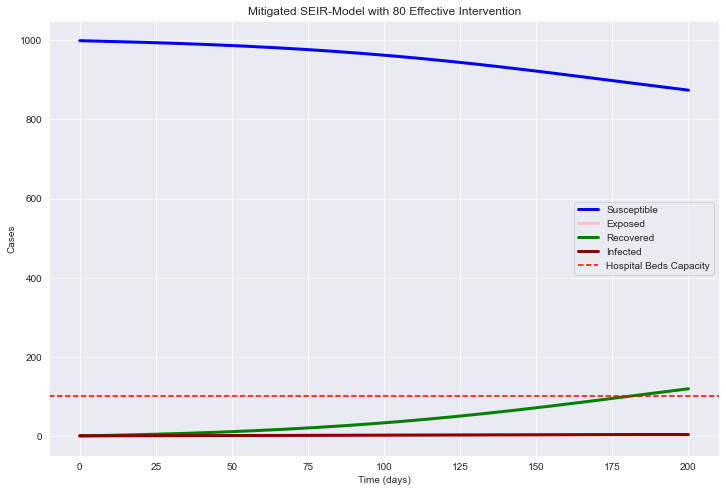

In [13]:
# Plotting the basic SEIR model results
t = np.linspace(0, 200, 200)
ret = odeint(adjusted_model, y0, t, args=(N, beta, gamma, delta,alpha,hospital_capacity))
S, E, I, R = ret.T
I80 = I
R_t = beta * S / (S + I + E + R)
# Set seaborn style and plotting the model
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
plt.plot(t, S, color='blue', lw=3,label='Susceptible')
plt.plot(t, E, color='pink', lw=3, label='Exposed')
plt.plot(t, R, color='green', lw=3,label='Recovered')
plt.plot(t, I, color='darkred',lw=3, label='Infected')
plt.axhline(hospital_capacity, color='red', linestyle='--', label='Hospital Beds Capacity')
plt.title('Mitigated SEIR-Model with 80 Effective Intervention')
plt.xlabel('Time (days)')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()


## Extracting the Infected cases from each Scenario and comparing them 

<Figure size 864x576 with 0 Axes>

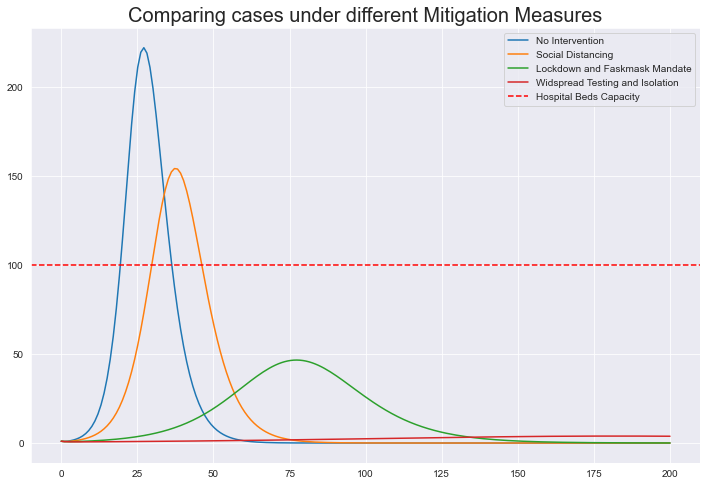

In [14]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()
ax.plot(t, I_no, label="No Intervention")
ax.plot(t, I30, label="Social Distancing ")
ax.plot(t, I50, label="Lockdown and Faskmask Mandate")
ax.plot(t, I80, label="Widspread Testing and Isolation")
plt.axhline(hospital_capacity, color='red', linestyle='--', label='Hospital Beds Capacity')
ax.legend()
plt.title('Comparing cases under different Mitigation Measures', fontsize = 20)
plt.show()

* We can observed that without intervention, the case peak will start with 25 days of the outbreak
* With only social distancing rule with 30% implementation, case peak will be experienced after 40 days 
* Lockdown and Facemask Mandate with 50% effectiveness can extended and reduce case hike after 75 days
* General testing and case Isolation of 80% effectiveness can flattern the curve and suppress the virus 

## Fitting the SEIR model to Italy Covid-19 Dataset and Estimating the parameters

In [15]:
def SEIR_model(y, Time, beta, delta, gamma):
    S, E, I, R = y
    N = S + E + I + R
    dSdt = -beta*S*I/N
    dEdt = beta*S*I/N - delta*E 
    dIdt = delta*E - gamma*I
    dRdt = gamma*I
    return [dSdt, dEdt, dIdt, dRdt]

In [16]:
N = 1000 # Population
beta = 0.8
D = 4.0 # number of infections in the lasts four days
gamma = 1.0 / D # rate of recovery
delta = 1.0 / 3.0  # incubation period of three days
alpha = 0.6
hospital_capacity =100
S0 = 999
E0 = 0
I0, R0 = N - S0, 0  # at a start only one is infected while other population remains susceptible
y0= S0, E0, I0, R0

In [17]:
italy_df = pd.read_csv("C:/Users/Think Pad/Desktop/Data Science/Sem Two/Research Proposal/SIR/Dataset/italy.csv")
italy_df['total_removed'] = italy_df['deaths'] + italy_df['recovered']

In [23]:
def Simulate_SEIR(Time, y0, params):
    E0, I0, R0, N = y0
    beta, delta, gamma = params['beta'].value, params['delta'].value, params['gamma'].value
    S0 = N - (E0 + I0 + R0)
    simulations = odeint(SEIR_model, [S0, E0, I0, R0], Time, args=(beta, delta, gamma))
    return simulations

In [21]:
N = 59440000
E0 = 1000
I0 = 47
R0 = 0
delta = 1/5.2
gamma = 1/2.9
R0 = 4
beta = R0 * gamma
days = 200

params = Parameters()
params.add('beta', value=beta, min=0, max=10)
params.add('delta', value=delta, min=0, max=10)
params.add('gamma', value=gamma, min=0, max=10)

In [24]:
y0 = [E0, I0, R0, N]
params['beta'].value, params['delta'].value,params['gamma'].value = [beta, delta, gamma]
t = np.arange(0, days, 1)
sol = Simulate_SEIR(t, y0, params)
S, E, I, R = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

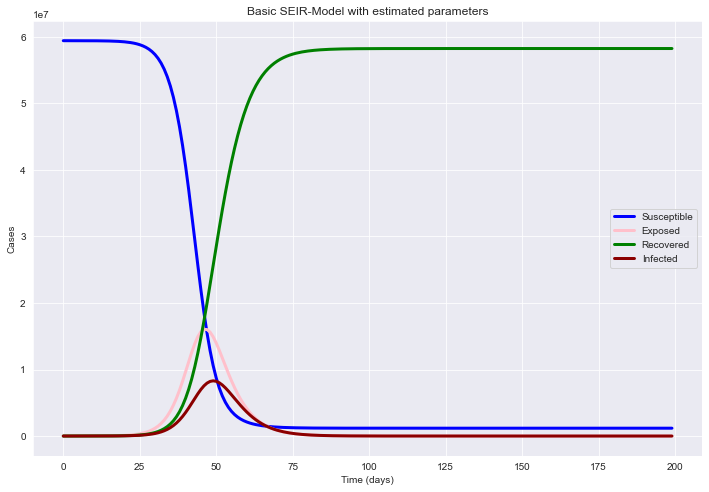

In [25]:
# Set seaborn style and plotting the model
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
plt.plot(t, S, color='blue', lw=3,label='Susceptible')
plt.plot(t, E, color='pink', lw=3, label='Exposed')
plt.plot(t, R, color='green', lw=3,label='Recovered')
plt.plot(t, I, color='darkred',lw=3, label='Infected')

plt.title('Basic SEIR-Model with estimated parameters')
plt.xlabel('Time (days)')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
def calculate_error(params, y0, tspan, data):
    sol = Simulate_SEIR(t, y0, params)
    return (sol[:, 2:4] - data).ravel()

In [27]:
y0 = [E0, I0, R0, N]
beta = 1.08
sigma = 0.02
gamma = 0.02
params['beta'].value = beta
params['delta'].value = delta
params['gamma'].value = gamma
days = 80
t = np.arange(0, days, 1)
data = italy_df.loc[0:(days-1), ['cases', 'total_removed']].values

In [28]:
# fit model and find predicted values
result = minimize(calculate_error, params, args=(y0, t, data), method='leastsq')
result.params

name,value,standard error,relative error,initial value,min,max,vary
beta,0.09050718,0.00816046,(9.02%),1.08,0.00000000,10.0000000,True
delta,1.11409819,1.20760414,(108.39%),0.1923076923076923,0.00000000,10.0000000,True
gamma,0.01900089,0.00110166,(5.80%),0.02,0.00000000,10.0000000,True


In [29]:
# display fitted statistics
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 192
    # data points      = 160
    # variables        = 3
    chi-square         = 7.6801e+09
    reduced chi-square = 48917821.8
    Akaike info crit   = 2835.87589
    Bayesian info crit = 2845.10141
[[Variables]]
    beta:   0.09050718 +/- 0.00816046 (9.02%) (init = 1.08)
    delta:  1.11409819 +/- 1.20760414 (108.39%) (init = 0.1923077)
    gamma:  0.01900089 +/- 0.00110166 (5.80%) (init = 0.02)
[[Correlations]] (unreported correlations are < 0.100)
    C(beta, delta)  = -0.9922
    C(beta, gamma)  = +0.5749
    C(delta, gamma) = -0.4713


In [30]:
output = data + result.residual.reshape(data.shape)
observed_infection = data[:, 0]
observed_removed = data[:, 1]
pred_infections = output[:, 0]
pred_removed = output[:, 1]

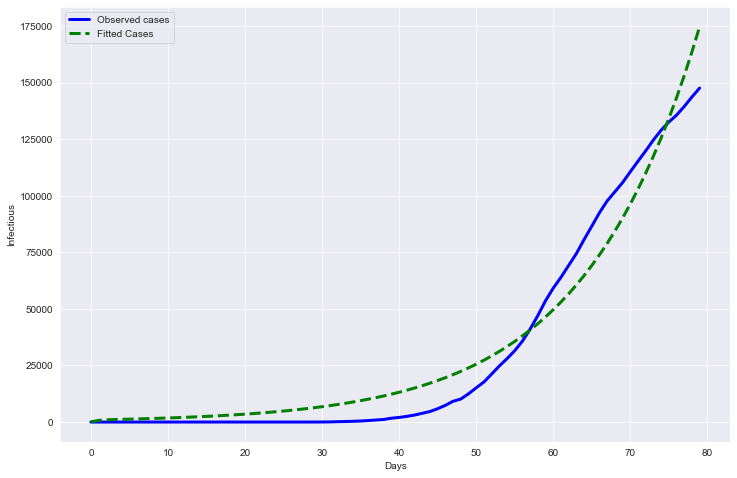

In [31]:
plt.plot(t, observed_infection, color='blue', lw=3, linestyle='-', label='Observed cases')
plt.plot(t, pred_infections, color = 'green', lw=3, linestyle='--', label='Fitted Cases')
plt.xlabel('Days')
plt.ylabel('Infectious')
plt.legend()
plt.show()

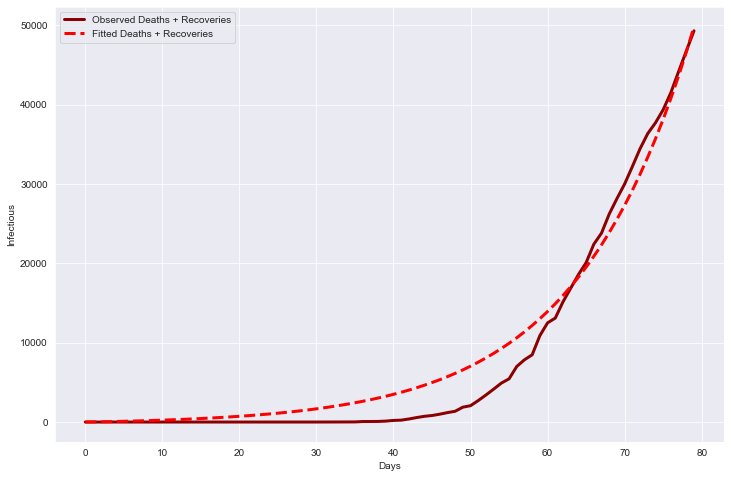

In [32]:
plt.plot(t, observed_removed, color='darkred', lw=3, linestyle='-', label='Observed Deaths + Recoveries')
plt.plot(t, pred_removed, color = 'red',lw=3, linestyle='--', label='Fitted Deaths + Recoveries')
plt.xlabel('Days')
plt.ylabel('Infectious')
plt.legend()
plt.show()

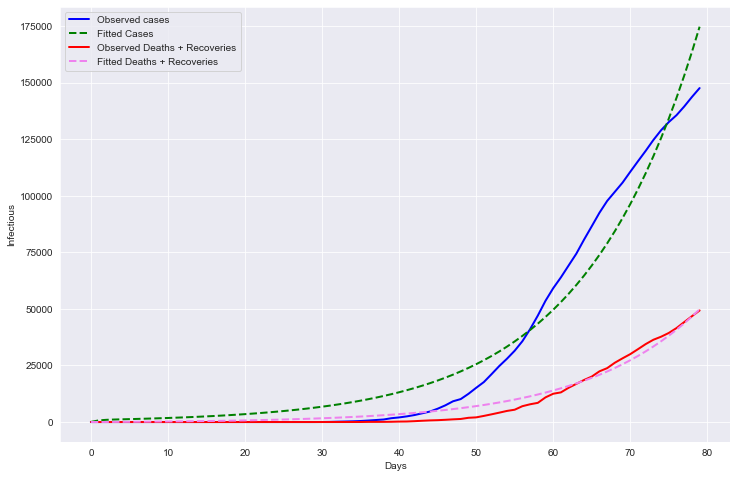

In [33]:
plt.plot(t, observed_infection, color='blue', lw=2, linestyle='-', label='Observed cases')
plt.plot(t, pred_infections, color = 'green',lw=2, linestyle='--', label='Fitted Cases')
plt.plot(t, observed_removed, color='red', lw=2,linestyle='-', label='Observed Deaths + Recoveries')
plt.plot(t, pred_removed, color = 'violet', lw=2,linestyle='--', label='Fitted Deaths + Recoveries')
plt.xlabel('Days')
plt.ylabel('Infectious')
plt.legend()
plt.show()

## Using Boostrapping method to calculate 95% Confidence intervals by bootstrapping the residuals from the SEIR model

Bootstrapping is conducted on the residuals obtained from the model fitting and the bootstrapped residuals are added to the original data in order to extract the bootstrapped predicted values. The 95% confidence intervals for both infections and removed cases is calculated after running the bootstrap process. the fitted and observed data along with the confidencet intervals are plotted. the uncertainity in the model predictions are in the shaded region of the plot to denote confidence intervals


In [34]:
# Calculate the residuals
residuals = result.residual.reshape(data.shape)

# Number of bootstrap iterations
num_iterations = 1000

In [35]:
# Create an array to store bootstrapped predicted values
bootstrap_predictions = np.zeros((num_iterations, len(t), 2))

In [36]:
# Perform bootstrapping and get bootstrapped predicted values
for i in range(num_iterations):
    # Generate bootstrapped residuals
    bootstrap_residuals = np.random.choice(residuals.ravel(), size=residuals.size, replace=True)
    bootstrap_residuals = bootstrap_residuals.reshape(residuals.shape)
    bootstrap_output = data + bootstrap_residuals
    
    bootstrap_predictions[i, :, 0] = bootstrap_output[:, 0]
    bootstrap_predictions[i, :, 1] = bootstrap_output[:, 1]

In [37]:
# Calculate the 95% confidence intervals for infections and removed
lower_bound_infections = np.percentile(bootstrap_predictions[:, :, 0], 2.5, axis=0)
upper_bound_infections = np.percentile(bootstrap_predictions[:, :, 0], 97.5, axis=0)
lower_bound_removed = np.percentile(bootstrap_predictions[:, :, 1], 2.5, axis=0)
upper_bound_removed = np.percentile(bootstrap_predictions[:, :, 1], 97.5, axis=0)


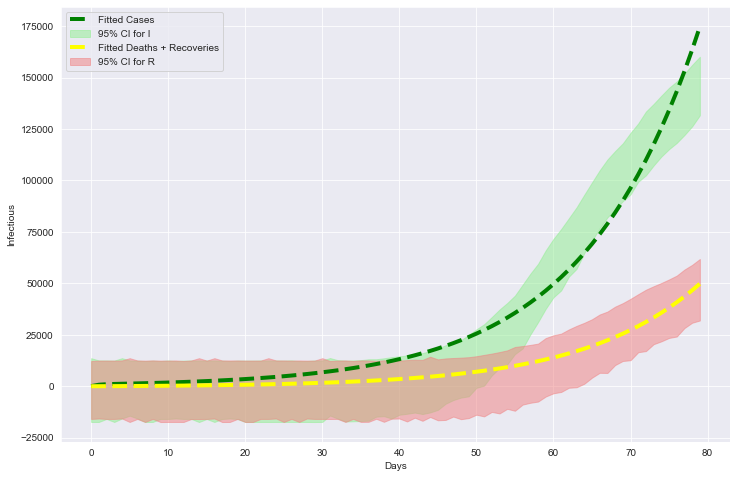

In [38]:
# Plot the observed and fitted data along with confidence intervals
plt.plot(t, pred_infections, color='green', lw=4, linestyle='--', label='Fitted Cases')
plt.fill_between(t, lower_bound_infections, upper_bound_infections, color='lightgreen', alpha=0.5,label ='95% CI for I')

plt.plot(t, pred_removed, color='yellow', lw=4, linestyle='--', label='Fitted Deaths + Recoveries')
plt.fill_between(t, lower_bound_removed, upper_bound_removed, color='lightcoral', alpha=0.5,label ='95% CI for R')

plt.xlabel('Days')
plt.ylabel('Infectious')
plt.legend()
plt.show()


The shaded region represents the confidence intervals around the fitted lines for the infectious and removed compartment

In [39]:
confidence_intervals_df = pd.DataFrame({
    'Infections Lower Bound': lower_bound_infections,
    'Infections Upper Bound': upper_bound_infections,
    'Removed Lower Bound': lower_bound_removed,
    'Removed Upper Bound': upper_bound_removed
})

confidence_intervals_df.head(10)

,Infections Lower Bound,Infections Upper Bound,Removed Lower Bound,Removed Upper Bound
0,-17365.695294,13633.406123,-15891.445002,12231.575587
1,-17365.695294,12525.536260,-15672.932937,12456.452756
2,-15891.445002,12525.536260,-15891.445002,12456.452756
3,-17366.502489,12456.452756,-15891.445002,12456.452756
4,-15672.932937,13633.406123,-15672.932937,12525.536260
5,-14316.809975,12525.536260,-17365.695294,13633.406123
6,-15672.932937,12458.179844,-15891.445002,12525.536260
7,-17365.695294,12231.575587,-17365.695294,12456.452756
8,-17365.695294,12458.179844,-15891.445002,12553.233007
9,-15889.445002,12233.575587,-17397.983128,12456.452756


In [40]:
observed_IR = italy_df.loc[:, ['cases', 'total_removed']].values
print(observed_IR.shape)

tspan_fit_pred = np.arange(0, observed_IR.shape[0], 1)
params['beta'].value = result.params['beta'].value
params['delta'].value = result.params['delta'].value
params['gamma'].value = result.params['gamma'].value
fitted_predicted = Simulate_SEIR(tspan_fit_pred, y0, params)

(188, 2)


In [41]:
fitted_predicted_IR = fitted_predicted[:, 2:4]
print(fitted_predicted_IR.shape)

(188, 2)


In [44]:
print("Fitted MAE")
print('Infected: ', np.mean(np.abs(fitted_predicted_IR[:days, 0] - observed_IR[:days, 0])))
print('Recovered/Deceased: ', np.mean(np.abs(fitted_predicted_IR[:days, 1] - observed_IR[:days, 1])))

print("\nFitted RMSE")
print('Infected: ', np.sqrt(np.mean((fitted_predicted_IR[:days, 0] - observed_IR[:days, 0])**2)))
print('Recoveries + Deaths : ', np.sqrt(np.mean((fitted_predicted_IR[:days, 1] - observed_IR[:days, 1])**2)))

Fitted MAE
Infected:  7696.0747738331165
Recovered/Deceased:  1890.0663740297946

Fitted RMSE
Infected:  9488.214973204482
Recoveries + Deaths :  2444.3816906841475


In [45]:
# 1. Define a function to perform the bootstrap resampling and parameter fitting
def bootstrap_fit(data, y0, t, params, num_iterations=1000):
    params_copy = params.copy()
    fitted_params_list = []

    for _ in range(num_iterations):
        # Perform bootstrap resampling
        bootstrap_indices = np.random.choice(len(data), len(data), replace=True)
        bootstrap_data = data[bootstrap_indices]

        # Fit the model using bootstrap data
        result = minimize(calculate_error, params_copy, args=(y0, t, bootstrap_data), method='leastsq')
        fitted_params_list.append(result.params)

    return fitted_params_list

In [47]:
# 2. Run the bootstrap process and collect the results
bootstrap_iterations = 1000  # You can adjust the number of iterations as needed
fitted_params_list = bootstrap_fit(data, y0, t, result.params, num_iterations=bootstrap_iterations)

# 3. Calculate the 95% confidence intervals from the collected bootstrap results
param_names = ['beta', 'delta', 'gamma']
confidence_intervals = {}
for param_name in param_names:
    param_values = [params[param_name].value for params in fitted_params_list]
    lower_bound = np.percentile(param_values, 2.5)  # 2.5th percentile
    upper_bound = np.percentile(param_values, 97.5)  # 97.5th percentile
    confidence_intervals[param_name] = (lower_bound, upper_bound)

print("95% Confidence Intervals:")
for param_name, (lower_bound, upper_bound) in confidence_intervals.items():
    print(f"{param_name}: ({lower_bound:.4f}, {upper_bound:.4f})")

95% Confidence Intervals:
beta: (0.0535, 0.0733)
delta: (9.9964, 10.0000)
gamma: (0.0120, 0.0171)


### Sensitivity Analysis using local and Global

In [41]:
import tensorflow as tf
assert tf.__version__[0] == '2', 'Tensorflow 2.x version required'

In [42]:
np.random.seed(2)
tf.random.set_seed(2)

In [43]:
def deriv(y, N, beta, gamma, delta,alpha):
    S,E, I, R = y
    dSdt = -beta * S * I / N * (1 - alpha)
    dEdt = beta * I * S / N * (1 - alpha) - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt,dEdt, dIdt, dRdt

In [44]:
def euler(deriv, y0, dt, steps, N, beta, gamma,delta,alpha):
    S0, E0, I0, R0 = y0
    S_result,E_result, I_result, R_result = S0,E0, I0, R0
    for i in range(steps-1):
        S1, E1, I1, R1 = deriv((S0,E0, I0, R0), N, beta, gamma,delta,alpha)
        next_s, next_e, next_i, next_r = S0 + dt*S1, E0 + dt*E1, I0 + dt*I1, R0 + dt*R1
        S_result = tf.concat([S_result, next_s], axis=0)
        E_result = tf.concat([E_result, next_e], axis=0)
        I_result = tf.concat([I_result, next_i], axis=0)
        R_result = tf.concat([R_result, next_r], axis=0)
        S0, E0, I0, R0 = next_s, next_e, next_i, next_r
    return S_result, E_result, I_result, R_result

In [45]:
# Total population
N = tf.constant([1000.])

# Initial infected and recovered individuals
I0, E0, R0 = tf.constant([1.]), tf.constant([0.]), tf.constant([0.])

# Everyone else, S0, is susceptible to infection initially
S0 = N - I0 - R0-E0

# Initial conditions tuple
y0 = S0, E0, I0, R0

# Contact rate (beta), and mean recovery rate (gamma), (in 1/days)
beta, gamma, delta, alpha = 0.6, 1./10, 0.33, 0.5

# A grid of time points (in days)
days = 350
t = np.linspace(0, days, days)
dt = 1.

In [46]:
S,E, I, R = euler(deriv, y0, dt, days, N, beta, gamma,delta,alpha)

## Local Sensitivity analysis using Tensor Flow

In [65]:
def model_I(deriv, y0, dt, steps, N, beta, gamma,delta,alpha):
    S,E, I, R = euler(deriv, y0, dt, steps, N, beta, gamma,delta,alpha)
    return I[:,None,None,None]

In [63]:
h = 0.4
beta, gamma,delta,alpha = tf.constant([0.4]), 0.25, 0.33, 0.01

In [50]:
res1 = model_I(deriv, y0, dt, days, N, beta + h, gamma,delta,alpha)
res2 = model_I(deriv, y0, dt, days, N, beta - h, gamma,delta,alpha)

(tf.reduce_sum(res1) - tf.reduce_sum(res2)) / (2.0*h)

<tf.Tensor: shape=(), dtype=float32, numpy=12486.118>

In [51]:
with tf.GradientTape() as g:
    g.watch(beta)
    I = model_I(deriv, y0, dt, days, N, beta, gamma,delta,alpha)
dI_dbeta = g.gradient(I, beta)

In [52]:
dI_dbeta[0]

<tf.Tensor: shape=(), dtype=float32, numpy=2035.282>

In [53]:
deltas = []
space = np.linspace(0.0, 0.4, 50)
for beta in space:
    beta = tf.constant([beta], dtype=tf.float32)
    with tf.GradientTape() as g:
        g.watch(beta)
        I = model_I(deriv, y0, dt, days, N, beta, gamma,delta,alpha)
    dI_dβ = g.gradient(I, beta)[0].numpy()
    deltas.append(dI_dβ)

In [54]:
def calculate_sensitivity_gamma(deriv, y0, dt, steps, N, beta, gamma, h,delta,alpha):
    res1 = model_I(deriv, y0, dt, steps, N, beta, gamma + h,delta,alpha)
    res2 = model_I(deriv, y0, dt, steps, N, beta, gamma - h,delta, alpha)
    sensitivity = (tf.reduce_sum(res1) - tf.reduce_sum(res2)) / (2.0 * h)
    return sensitivity

In [55]:
def calculate_sensitivity_beta(deriv, y0, dt, steps, N, beta, gamma, h,delta,alpha):
    res1 = model_I(deriv, y0, dt, steps, N, beta + h, gamma,delta,alpha)
    res2 = model_I(deriv, y0, dt, steps, N, beta - h, gamma,delta,alpha)
    sensitivity = (tf.reduce_sum(res1) - tf.reduce_sum(res2)) / (2.0 * h)
    return sensitivity

In [66]:
# Calculate sensitivity for various values of gamma in the range [0.25, 0.8]
deltas_gamma = []
space = np.linspace(0.25, 0.8, 50)
for gamma_value in space:
    gamma_value_tf = tf.constant([gamma_value], dtype=tf.float32)
    sensitivity_gamma = calculate_sensitivity_gamma(deriv, y0, dt, days, N, beta, gamma_value_tf, h,delta,alpha)
    deltas_gamma.append(sensitivity_gamma.numpy())

In [57]:
# Function to calculate the sensitivity of the infection curve with respect to delta
def calculate_sensitivity_delta(deriv, y0, dt, steps, N, beta, gamma, delta, alpha, h):
    res1 = model_I(deriv, y0, dt, steps, N, beta, gamma, delta + h, alpha)
    res2 = model_I(deriv, y0, dt, steps, N, beta, gamma, delta - h, alpha)
    sensitivity = (tf.reduce_sum(res1) - tf.reduce_sum(res2)) / (2.0 * h)
    return sensitivity

In [58]:
# Function to calculate the sensitivity of the infection curve with respect to alpha
def calculate_sensitivity_alpha(deriv, y0, dt, steps, N, beta, gamma, delta, alpha, h):
    res1 = model_I(deriv, y0, dt, steps, N, beta, gamma, delta, alpha + h)
    res2 = model_I(deriv, y0, dt, steps, N, beta, gamma, delta, alpha - h)
    sensitivity = (tf.reduce_sum(res1) - tf.reduce_sum(res2)) / (2.0 * h)
    return sensitivity

In [59]:
# Calculate sensitivity for various values of delta in the range [0.0, 1.0]
deltas_sensitivity = []
space_delta = np.linspace(0.0, 1.0, 50)
for delta_value in space_delta:
    delta_value_tf = tf.constant([delta_value], dtype=tf.float32)
    sensitivity_delta = calculate_sensitivity_delta(deriv, y0, dt, days, N, beta, gamma, delta_value_tf, alpha, h)
    deltas_sensitivity.append(sensitivity_delta.numpy())

In [60]:
# Calculate sensitivity for various values of alpha in the range [0.0, 1.0]
alphas_sensitivity = []
space_alpha = np.linspace(0.0, 1.0, 50)
for alpha_value in space_alpha:
    alpha_value_tf = tf.constant([alpha_value], dtype=tf.float32)
    sensitivity_alpha = calculate_sensitivity_alpha(deriv, y0, dt, days, N, beta, gamma, delta, alpha_value_tf, h)
    alphas_sensitivity.append(sensitivity_alpha.numpy())


In [67]:
sensitivities = []

parameters = ['Beta', 'Gamma', 'Delta', 'Alpha']
parameter_values = [beta, gamma, delta, alpha]

for i, param_value in enumerate(parameter_values):
    deltas_sensitivity = []
    space = np.linspace(0.0, 0.4, 50) if i < 2 else np.linspace(0.0, 1.0, 50)
    for value in space:
        value_tf = tf.constant([value], dtype=tf.float32)
        if i == 0:
            sensitivity = calculate_sensitivity_beta(deriv, y0, dt, days, N, value_tf, gamma, h,delta,alpha)
        elif i == 1:
            sensitivity = calculate_sensitivity_gamma(deriv, y0, dt, days, N, beta, value_tf, h,delta,alpha)
        elif i == 2:
            sensitivity = calculate_sensitivity_delta(deriv, y0, dt, days, N, beta, gamma, value_tf, alpha, h)
        else:
            sensitivity = calculate_sensitivity_alpha(deriv, y0, dt, days, N, beta, gamma, delta, value_tf, h)
        deltas_sensitivity.append(sensitivity.numpy())
    sensitivities.append(deltas_sensitivity)



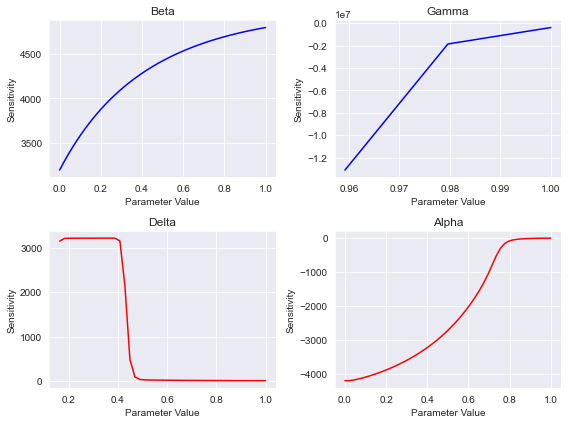

In [68]:
# Plot the sensitivities for beta, gamma, delta, and alpha in 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for i, ax in enumerate(axes.flatten()):
    ax.plot(space, sensitivities[i], color='blue' if i < 2 else 'red')
    ax.set_title(parameters[i])
    ax.set_xlabel('Parameter Value')
    ax.set_ylabel('Sensitivity')

plt.tight_layout()
plt.show()

### Global Sensitivity analysis using Sobol's method and SALid

In [149]:
from SALib.sample import saltelli
from SALib.analyze import sobol

In [158]:
problem = {
    'num_vars': 4,
    'names': ['beta', 'gamma', 'delta', 'alpha'],
    'bounds': [[0.0, 0.4], [1./18, 1./8], [0.0, 1.0], [0.0, 1.0]]
}

In [159]:
# Generate parameter samples using Saltelli sampling
param_values = saltelli.sample(problem, 100, calc_second_order=False)

# Function to calculate model output for a given set of parameters
def calculate_model_output(parameters):
    beta, gamma, delta, alpha = parameters
    return tf.reduce_sum(model_I(deriv, y0, dt, days, N, beta, gamma, delta, alpha))

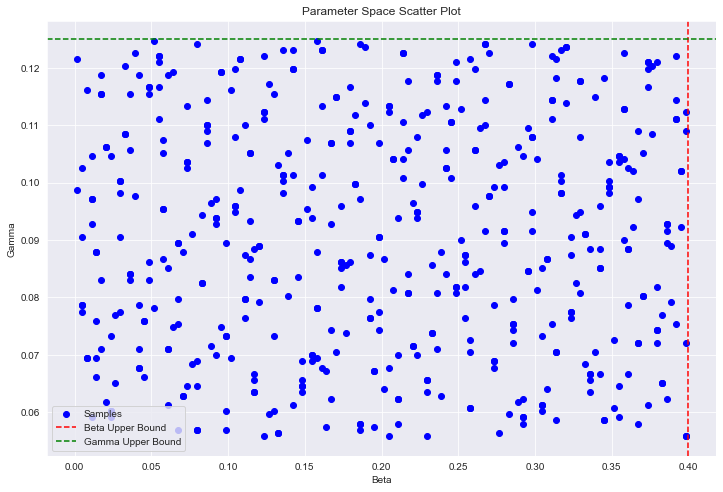

In [165]:
import matplotlib.pyplot as plt

# Assuming param_values contains the samples from Saltelli sampling

# Plotting the scatter plot
plt.scatter(param_values[:, 0], param_values[:, 1], label='Samples', marker='o', color='b')

# Adding labels and title
plt.xlabel('Beta')
plt.ylabel('Gamma')
plt.title('Parameter Space Scatter Plot')

# Adding horizontal and vertical lines to represent parameter bounds
plt.axvline(x=0.4, color='r', linestyle='--', label='Beta Upper Bound')
plt.axhline(y=1./8, color='g', linestyle='--', label='Gamma Upper Bound')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


In [160]:
# Calculate model output (Y) for each parameter sample
Y = np.zeros([param_values.shape[0]])
for i, params in enumerate(param_values):
    Y[i] = calculate_model_output(params)

In [161]:
# Perform Sobol sensitivity analysis
Si = sobol.analyze(problem, Y, calc_second_order=False)

In [163]:
Si

{'S1': array([0.29452659, 0.09840176, 0.0378241 , 0.33084332]),
 'S1_conf': array([0.16468701, 0.13141275, 0.04321062, 0.16004948]),
 'ST': array([0.57248165, 0.231627  , 0.04495646, 0.61376279]),
 'ST_conf': array([0.23154072, 0.07895132, 0.06032628, 0.21376397])}

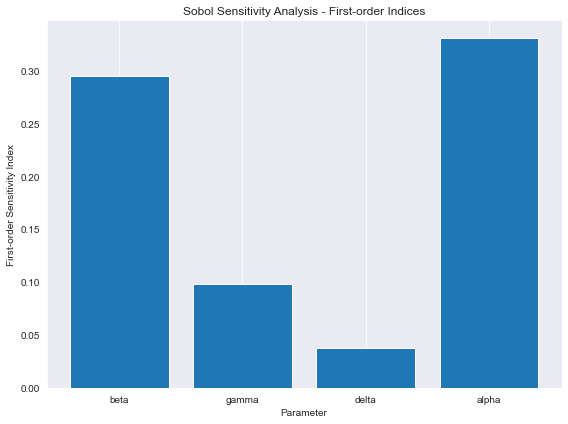

In [162]:
# Plot the first-order sensitivity indices using bar plots
fig, ax = plt.subplots(figsize=(8, 6))

param_names = problem['names']
sensitivity_indices = Si['S1']

ax.bar(param_names, sensitivity_indices)
ax.set_ylabel('First-order Sensitivity Index')
ax.set_xlabel('Parameter')
ax.set_title('Sobol Sensitivity Analysis - First-order Indices')
ax.grid(axis='y')

plt.tight_layout()
plt.show()

### Fitting the model to other Countries Covid-19 dataset and using time dependent transmission rate

In [48]:
def modified_SEIR_model(y,t,N,beta,gamma):
    S,E,I,R = y
    dsdt = -beta * I * S / N * (1 - alpha)
    dedt = beta * I * S / N * (1 - alpha)- E / Tg
    didt = E / Tg - gamma * I
    drdt = gamma * I
    return dsdt, dedt, didt, drdt

In [50]:
japan_df = pd.read_csv("C:/Users/Think Pad/Desktop/Data Science/Sem Two/Research Proposal/SIR/Dataset/japan.csv")
cases = japan_df['cases']
active = japan_df['active']
japan_df['total_removed'] = japan_df['deaths'] + japan_df['recovered']

In [51]:
t = np.arange(len(cases))
Tg = 7.5 # Generation time is the time between primary and secondary infection
# latent period
Tl = 3
# infectious period
Ti = Tg - Tl

def calculate_R0(confirm, active, t):
    p = 0.695 # probability of active case recovering
    # rho is the ratio of the incubation period to the generation time
    rho = Tl / Tg
    # yt represents the estimated actual number of infections
    yt = confirm * p + active
    # lambda is the growth rate of early exponential growth
    lamda = math.log(yt) / t
    R0 = 1 + lamda * Tg + rho * (1 - rho) * pow(lamda * Tg, 2)
    return R0


In [52]:
R0 = calculate_R0(active.iloc[-1], cases.iloc[-1],t)
japan_df['R0'] = R0

In [53]:
T = 300
Time = np.arange(0, T + 1)
# R0 is basic reproduction number
from pandas import DataFrame
R0 = japan_df.iloc[len(japan_df)-1,japan_df.shape[1]-1]

# beta is effective contact rate 
def betaFunc(R0 = R0, Ti = Ti):
    return R0/Ti
# gamma is removal rate
def gammaFunc(Tg = Tg):
    return 1/Tg
gamma = gammaFunc()
gamma_japan = gamma

In [76]:
# create dates
from datetime import date
import datetime
start_day_japan = date(2020, 1, 22)
dates_japan= [start_day_japan + datetime.timedelta(n) for n in range(T + 1)]

start_day = date(2020, 1, 25)
dates = [start_day + datetime.timedelta(n) for n in range(T + 1)]

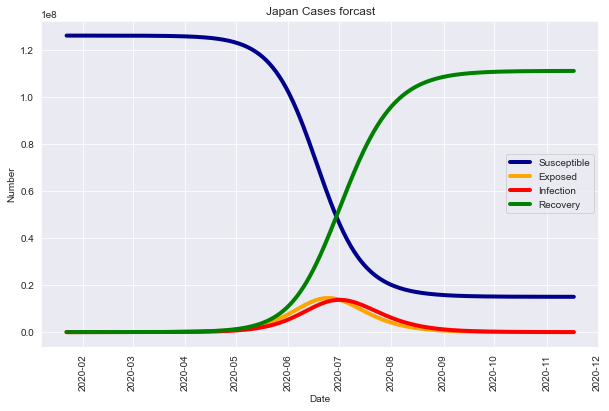

 Reproduction number under the lockdown is : 1.4643547880251067
 Calculated transimission (rate Beta) : 0.32541217511669035
 Calculated recovered rate (Gamma) : 0.13333333333333333
 Forcasted total cases at peak : 13746941.786228504 162
 Case hikes expected on : 2020-07-02


In [79]:
# R0 is basic reproduction number
from pandas import DataFrame
R0 = japan_df.iloc[len(japan_df)-1,japan_df.shape[1]-1]
# beta is effective contact rate
beta = betaFunc(R0)
alpha = 0.01
R0_japan = R0
beta_japan = beta
N = 126300000 #population of Japan
I = 860
INI = (N, 0, I, 0)
# solve the system of differential equations
RES = odeint(modified_SEIR_model, INI, Time, args=(N, beta, gamma))

#plotting the results

plt.figure(figsize=(10, 6))
plt.plot(dates_japan, RES[:,0],color = 'darkblue', lw=4, label = 'Susceptible')
plt.plot(dates_japan, RES[:,1],color = 'orange', lw=4,label = 'Exposed')
plt.plot(dates_japan, RES[:,2],color = 'red',lw=4, label = 'Infection')
plt.plot(dates_japan, RES[:,3],color = 'green',lw=4,label = 'Recovery')

plt.title('Japan Cases forcast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.show()

print(" Reproduction number under the lockdown is :", R0)
print(" Calculated transimission (rate Beta) :", beta)
print(" Calculated recovered rate (Gamma) :", gamma)
print(" Forcasted total cases at peak :",  max(RES[:,2]),np.argmax(RES[:,2]))
print(" Case hikes expected on :",  start_day_japan + datetime.timedelta(int(np.argmax(RES[:,2]))))
plt.show()

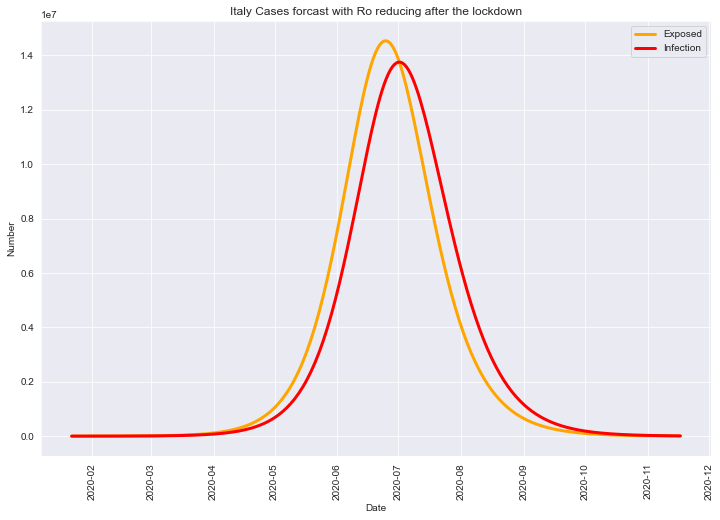

In [80]:
#plotting the results
plt.figure(figsize=(12, 8))
plt.plot(dates_japan, RES[:,1],color = 'orange',lw=3,label = 'Exposed')
plt.plot(dates_japan, RES[:,2],color = 'red', lw=3,label = 'Infection')
#plt.plot(dates_japan, RES[:,3],color = 'green', lw=3,label = 'Removed')
plt.title('Italy Cases forcast with Ro reducing after the lockdown')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.show()

### Imposing Social distancing rule with 30% effectiveness 

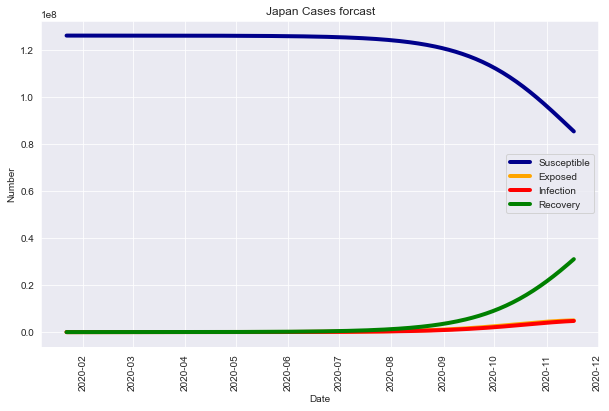

 Reproduction number under the lockdown is : 1.4643547880251067
 Calculated transimission (rate Beta) : 0.32541217511669035
 Calculated recovered rate (Gamma) : 0.13333333333333333
 Forcasted total cases at peak : 4750130.661812586 300
 Case hikes expected on : 2020-11-17


In [82]:
# R0 is basic reproduction number
from pandas import DataFrame
R0 = japan_df.iloc[len(japan_df)-1,japan_df.shape[1]-1]
# beta is effective contact rate
beta = betaFunc(R0)
alpha = 0.35
R0_japan = R0
beta_japan = beta
N = 126300000 #population of Japan
I = 860
INI = (N, 0, I, 0)
# solve the system of differential equations
RES = odeint(modified_SEIR_model, INI, Time, args=(N, beta, gamma))

#plotting the results

plt.figure(figsize=(10, 6))
plt.plot(dates_japan, RES[:,0],color = 'darkblue', lw=4, label = 'Susceptible')
plt.plot(dates_japan, RES[:,1],color = 'orange', lw=4,label = 'Exposed')
plt.plot(dates_japan, RES[:,2],color = 'red',lw=4, label = 'Infection')
plt.plot(dates_japan, RES[:,3],color = 'green',lw=4,label = 'Recovery')

plt.title('Japan Cases forcast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.show()

print(" Reproduction number under the lockdown is :", R0)
print(" Calculated transimission (rate Beta) :", beta)
print(" Calculated recovered rate (Gamma) :", gamma)
print(" Forcasted total cases at peak :",  max(RES[:,2]),np.argmax(RES[:,2]))
print(" Case hikes expected on :",  start_day_japan + datetime.timedelta(int(np.argmax(RES[:,2]))))
plt.show()

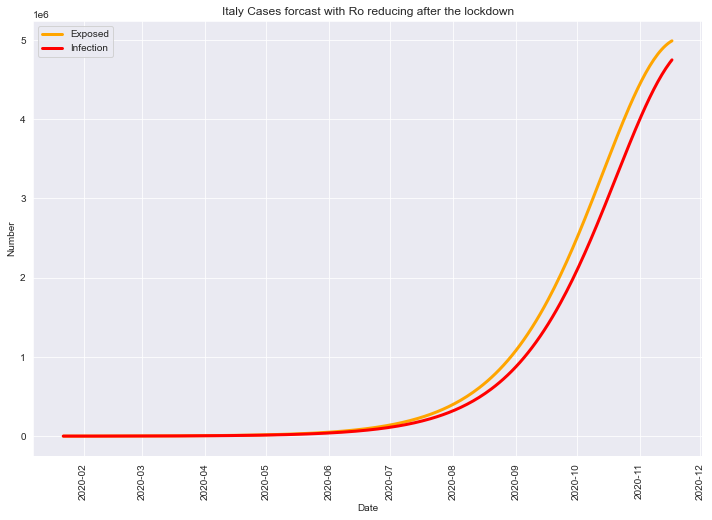

In [83]:
#plotting the results
plt.figure(figsize=(12, 8))
plt.plot(dates_japan, RES[:,1],color = 'orange',lw=3,label = 'Exposed')
plt.plot(dates_japan, RES[:,2],color = 'red', lw=3,label = 'Infection')
#plt.plot(dates_japan, RES[:,3],color = 'green', lw=3,label = 'Removed')
plt.title('Italy Cases forcast with Ro reducing after the lockdown')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.show()

In [92]:
india_df = pd.read_csv("C:/Users/Think Pad/Desktop/Data Science/Sem Two/Research Proposal/SIR/Dataset/india.csv")
cases = india_df['cases']
active = india_df['active']

In [93]:
t = np.arange(len(cases))
# generation time
Tg = 7.5
# latent period
Tl = 3
# infectious period
Ti = Tg - Tl

def R0Func(confirm, suspect, t):
    
    # p is the probability of suspected cases turning into confirmed cases
    p = 0.695
    # rho is the ratio of the incubation period to the generation time
    rho = Tl / Tg
    # yt represents the estimated actual number of infections
    yt = suspect * p + confirm
    # lambda is the growth rate of early exponential growth
    lamda = math.log(yt) / t
    R0 = 1 + lamda * Tg + rho * (1 - rho) * pow(lamda * Tg, 2)
    return R0

In [94]:
R0 = R0Func(active.iloc[-1], cases.iloc[-1],t)

india_df['R0'] = R0
R0_plot = R0

In [95]:
def Basic_SEIR(y,t,N,beta,gamma):
    S,E,I,R = y
    dsdt = -beta * I * S / N
    dedt = beta * I * S / N - E / Tg
    didt = E / Tg - gamma * I
    drdt = gamma * I
    return dsdt, dedt, didt, drdt

In [96]:
T = 300
Time = np.arange(0, T + 1)
# R0 is basic reproduction number
from pandas import DataFrame
R0 = india_df.iloc[len(india_df)-1,india_df.shape[1]-1]

# beta is effective contact rate 
def betaFunc(R0 = R0, Ti = Ti):
    return R0/Ti
# gamma is removal rate
def gammaFunc(Tg = Tg):
    return 1/Tg
gamma = gammaFunc()
gamma_india = gamma

In [97]:
# create dates
from datetime import date
import datetime
start_day_india = date(2020, 1, 22)
dates_india= [start_day_india + datetime.timedelta(n) for n in range(T + 1)]

start_day = date(2020, 1, 25)
dates = [start_day + datetime.timedelta(n) for n in range(T + 1)]

In [98]:
R0 = india_df.iloc[len(india_df)-1,india_df.shape[1]-1]
# beta is effective contact rate
beta = betaFunc(R0)
R0_india = R0
beta_india = beta
N = 1380004385
I = 20
INI = (N, 10, I, 0)

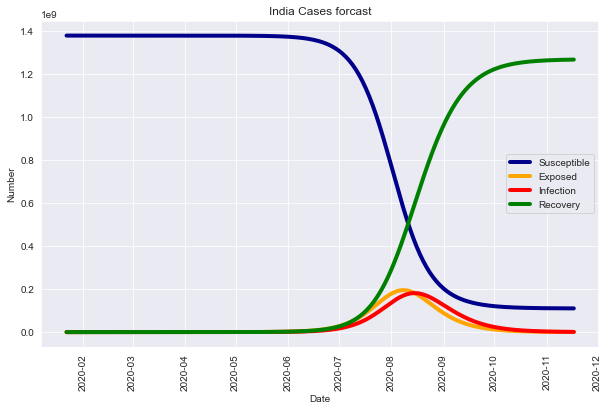

 SEIR Model prediction in India : 1.6492505517329155
 Calculated transimission (rate Beta) : 0.36650012260731457
 Calculated recovered rate (Gamma) : 0.13333333333333333
 Forcasted total cases at peak : 181502776.10379502 206
 Case hikes expected on : 2020-08-15


In [104]:
# solve the system of differential equations
RES = odeint(Basic_SEIR, INI, Time, args=(N, beta, gamma))
#R0_over_time = [logistic_R_0(i) for i in range(len(t))]
#plotting the results

plt.figure(figsize=(10, 6))
plt.plot(dates_japan, RES[:,0],color = 'darkblue', lw=4, label = 'Susceptible')
plt.plot(dates_japan, RES[:,1],color = 'orange', lw=4, label = 'Exposed')
plt.plot(dates_japan, RES[:,2],color = 'red', lw=4, label = 'Infection')
plt.plot(dates_japan, RES[:,3],color = 'green', lw=4, label = 'Recovery')

plt.title('India Cases forcast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.show()

print(" SEIR Model prediction in India :", R0)
print(" Calculated transimission (rate Beta) :", beta)
print(" Calculated recovered rate (Gamma) :", gamma)
print(" Forcasted total cases at peak :",  max(RES[:,2]),np.argmax(RES[:,2]))
print(" Case hikes expected on :",  start_day_japan + datetime.timedelta(int(np.argmax(RES[:,2]))))
plt.show()

In [ ]:

plt.plot(t, R0_over_time, 'r--', alpha=0.7, linewidth=2, label='R_0')
#plt.plot(dates_japan, RES[:,2],color = 'red',label = 'Infection')

plt.xlabel('Time (days')
plt.ylabel('R_0 over time')
plt.title('Cases dropping as R_0 drops over time')
plt.legend()
plt.show()

### USA Calibration

In [105]:
usa_df = pd.read_csv("C:/Users/Think Pad/Desktop/Data Science/Sem Two/Research Proposal/SIR/Dataset/us.csv")
cases = usa_df['cases']
active = usa_df['active']

In [106]:
t = np.arange(len(cases))

In [107]:
Tg = 7.5 # Generation time is the time between primary and secondary infection
# latent period
Tl = 3
# infectious period
Ti = Tg - Tl

import math

def R0Func(confirm, active, t):
    p = 0.695 # probability of active case recovering
    # rho is the ratio of the incubation period to the generation time
    rho = Tl / Tg
    # yt represents the estimated actual number of infections
    yt = confirm * p + active
    # lambda is the growth rate of early exponential growth
    lamda = math.log(yt) / t
    R0 = 1 + lamda * Tg + rho * (1 - rho) * pow(lamda * Tg, 2)
    return R0


In [108]:
R0 = R0Func(active.iloc[-1], cases.iloc[-1],t)
usa_df['R0'] = R0

In [109]:
def Basic_SEIR(y,t,N,beta,gamma):
    S,E,I,R = y
    dsdt = -beta * I * S / N
    dedt = beta * I * S / N - E / Tg
    didt = E / Tg - gamma * I
    drdt = gamma * I
    return dsdt, dedt, didt, drdt

In [110]:
T = 300
Time = np.arange(0, T + 1)
# R0 is basic reproduction number
from pandas import DataFrame
R0 = usa_df.iloc[len(usa_df)-1,usa_df.shape[1]-1]

# beta is effective contact rate 
def betaFunc(R0 = R0, Ti = Ti):
    return R0/Ti
# gamma is removal rate
def gammaFunc(Tg = Tg):
    return 1/Tg
gamma = gammaFunc()
gamma_usa = gamma

In [111]:
# create dates
from datetime import date
import datetime
start_day_usa = date(2020, 1, 22)
dates_usa= [start_day_japan + datetime.timedelta(n) for n in range(T + 1)]

start_day = date(2020, 1, 25)
dates = [start_day + datetime.timedelta(n) for n in range(T + 1)]

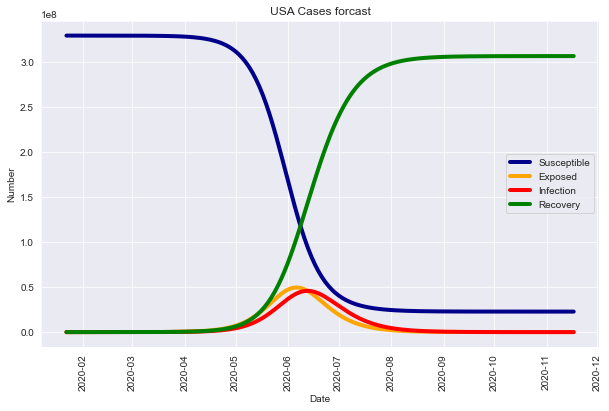

 Reproduction number under the lockdown is : 1.722108761880459
 Calculated transimission (rate Beta) : 0.38269083597343534
 Calculated recovered rate (Gamma) : 0.13333333333333333
 Forcasted total cases at peak : 45809632.415150166 143
 Case hikes expected on : 2020-06-13


In [114]:
import scipy.integrate as spi
# R0 is basic reproduction number
from pandas import DataFrame
R0 = usa_df.iloc[len(usa_df)-1,usa_df.shape[1]-1]
# beta is effective contact rate
beta = betaFunc(R0)
R0_usa = R0
beta_usa = beta
N = 329500000 #population of Japan
I = 860
INI = (N, 0, I, 0)
# solve the system of differential equations
RES = odeint(Basic_SEIR, INI, Time, args=(N, beta, gamma))

#plotting the results

plt.figure(figsize=(10, 6))
plt.plot(dates_usa, RES[:,0],color = 'darkblue',lw=4, label = 'Susceptible')
plt.plot(dates_usa, RES[:,1],color = 'orange',lw=4, label = 'Exposed')
plt.plot(dates_usa, RES[:,2],color = 'red',lw=4, label = 'Infection')
plt.plot(dates_usa, RES[:,3],color = 'green',lw=4, label = 'Recovery')

plt.title('USA Cases forcast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.show()

print(" Reproduction number under the lockdown is :", R0)
print(" Calculated transimission (rate Beta) :", beta)
print(" Calculated recovered rate (Gamma) :", gamma)
print(" Forcasted total cases at peak :",  max(RES[:,2]),np.argmax(RES[:,2]))
print(" Case hikes expected on :",  start_day_usa + datetime.timedelta(int(np.argmax(RES[:,2]))))
plt.show()

In [115]:
italy_df = pd.read_csv("C:/Users/Think Pad/Desktop/Data Science/Sem Two/Research Proposal/SIR/Dataset/italy.csv")
cases = italy_df['cases']
active = italy_df['active']

In [116]:
t = np.arange(len(cases))
Tg = 7.5 # Generation time is the time between primary and secondary infection
# latent period
Tl = 3
# infectious period
Ti = Tg - Tl


def R0Func(confirm, active, t):
    p = 0.695 # probability of active case recovering
    # rho is the ratio of the incubation period to the generation time
    rho = Tl / Tg
    # yt represents the estimated actual number of infections
    yt = confirm * p + active
    # lambda is the growth rate of early exponential growth
    lamda = math.log(yt) / t
    R0 = 1 + lamda * Tg + rho * (1 - rho) * pow(lamda * Tg, 2)
    return R0

In [117]:
R0 = R0Func(active.iloc[-1], cases.iloc[-1],t)
italy_df['R0'] = R0

In [118]:
def Basic_SEIR(y,t,N,beta,gamma):
    S,E,I,R = y
    dsdt = -beta * I * S / N
    dedt = beta * I * S / N - E / Tg
    didt = E / Tg - gamma * I
    drdt = gamma * I
    return dsdt, dedt, didt, drdt

In [119]:
T = 300
Time = np.arange(0, T + 1)
# R0 is basic reproduction number
from pandas import DataFrame
R0 = italy_df.iloc[len(italy_df)-1,italy_df.shape[1]-1]

# beta is effective contact rate 
def betaFunc(R0 = R0, Ti = Ti):
    return R0/Ti
# gamma is removal rate
def gammaFunc(Tg = Tg):
    return 1/Tg
gamma = gammaFunc()
gamma_italy = gamma

In [120]:
# create dates
from datetime import date
import datetime
start_day_italy = date(2020, 1, 22)
dates_italy = [start_day_italy + datetime.timedelta(n) for n in range(T + 1)]

start_day = date(2020, 1, 25)
dates = [start_day + datetime.timedelta(n) for n in range(T + 1)]

In [121]:
R0 = italy_df.iloc[len(italy_df)-1,italy_df.shape[1]-1]
# beta is effective contact rate
beta = betaFunc(R0)
R0_italy = R0
beta_italy = beta
N = 59440000
I = 880
INI = (N, 0, I, 0)

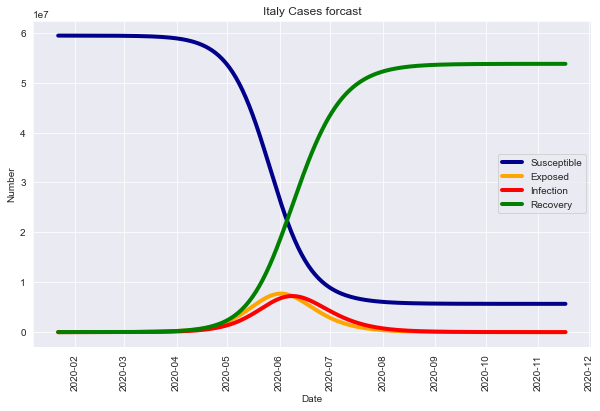

 Reproduction number under the lockdown is : 1.5591282557731367
 Calculated transimission (rate Beta) : 0.3464729457273637
 Calculated recovered rate (Gamma) : 0.13333333333333333
 Forcasted total cases at peak : 7231007.276104257 138
 Case hikes expected on : 2020-06-08


In [123]:
# solve the system of differential equations
RES = odeint(Basic_SEIR, INI, Time, args=(N, beta, gamma))

#plotting the results

plt.figure(figsize=(10, 6))
plt.plot(dates_japan, RES[:,0],color = 'darkblue',lw=4, label = 'Susceptible')
plt.plot(dates_japan, RES[:,1],color = 'orange', lw=4, label = 'Exposed')
plt.plot(dates_japan, RES[:,2],color = 'red',lw=4, label = 'Infection')
plt.plot(dates_japan, RES[:,3],color = 'green',lw=4, label = 'Recovery')

plt.title('Italy Cases forcast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.show()

print(" Reproduction number under the lockdown is :", R0)
print(" Calculated transimission (rate Beta) :", beta)
print(" Calculated recovered rate (Gamma) :", gamma)
print(" Forcasted total cases at peak :",  max(RES[:,2]),np.argmax(RES[:,2]))
print(" Case hikes expected on :",  start_day_japan + datetime.timedelta(int(np.argmax(RES[:,2]))))
plt.show()